# Project 2

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

Our PDE is the following:
$$
\begin{aligned}
    -\partial_x (\alpha (x) \partial_x u) + \partial_x (b(x) u) + c(x) u = f(x), \qquad  \text{in } \qquad \Omega=(0,1)  
\end{aligned}
$$

From this equation we can derive the following product for $F(v)$
$$
\begin{aligned}
a(u,v) &= F(v) \\
\end{aligned}
$$
which can be rewritten as
$$
\begin{aligned}
a(u,v) &= \int_0^1 \left(\alpha (x)u_x v_x - b(x)u v_x  + c(x)u v \right)dx,
\end{aligned}
$$

We want to solve the PDE problem by creating a linear system given on the form:


$$A \vec U = \vec F$$

where
$$A_{ij}=a(\phi_j,\phi_i),\qquad \vec U = [U_0 , \dots, U_M],\qquad \vec F = [ F(\phi_0), \dots, F(\phi_M) ]$$

We chose to use local basis for $X^1_h|_{K} = \mathbb{P}_1(K)$. We the get the following expression for our basis function in diffrenet triangulation $K_i$.


$$
\mathbb{P}_1(K) = span\{\phi^i_0,\phi^i_1\} \\
\begin{aligned}
&\phi_{i-1}|_{K_i} =\phi_0^i = 1- \frac{x}{h_i}, \qquad (\phi_0^i)\prime =-\frac{1}{h_i} \\
&\phi_{i}|_{K_i} =\phi_1^i = \frac{x}{h_i}, \qquad (\phi_1^i)\prime =+\frac{1}{h_i} \\
&\phi_{j}|_{K_i} = 0 \\
\end{aligned}
$$

We then have to solve $a^{K_i}(\phi_i,\phi_j)$ for the diffrent possible interactions:

$a^{K_i}(\phi_{i},\phi_{i})$:
$$
\begin{aligned}
a^{k_i}(\phi_i,\phi_i) &= \int_{0}^{h_i} \left(\alpha (\phi_1^i)\prime (\phi_1^i)\prime - b (\phi_1^i) (\phi_1^i)\prime  + c (\phi_1^i) (\phi_1^i) \right)dx \\
&=\int_{0}^{h_i} \left(\alpha (\frac{1}{h_i})(\frac{1}{h_i})- b (\frac{x}{h_i}) (\frac{1}{h_i})  + c (\frac{x}{h_i}) (\frac{x}{h_i}) \right)dx \\
&=\alpha \frac{h_i}{h_i^2}- \frac{b}{2}\frac{h_i^2}{h_i^2}  + \frac{c}{3}\frac{h_i^3}{h_i^2} \\
&= \frac{\alpha}{h_i}- \frac{b}{2} + \frac{c}{3}h_i 
\end{aligned}
$$

$a^{K_i}(\phi_{i-1},\phi_{i-1})$:
$$
\begin{aligned}
a^{K_i}(\phi_{i-1},\phi_{i-1}) &= \int_{0}^{h_i} \left(\alpha (\phi_0^i)\prime (\phi_0^i)\prime - b (\phi_0^i) (\phi_0^i)\prime  + c (\phi_0^i) (\phi_0^i) \right)dx \\
&=\int_{0}^{h_i} \left(\alpha (\frac{-1}{h_i})(\frac{-1}{h_i})- b (1-\frac{x}{h_i}) (\frac{-1}{h_i})  + c (1-\frac{x}{h_i}) (1- \frac{x}{h_i}) \right)dx \\
&= [\frac{x}{h_i^2} - b(\frac{-x}{h_i}+\frac{x^2}{2h_i^2}) + c(x-\frac{x^2}{h_i} +\frac{x^3}{3h_i^2})]_0^1\\
&=\alpha \frac{h_i}{h_i^2} + \frac{b}{2}\frac{h_i^2}{h_i^2}  + \frac{c}{3}\frac{h_i^3}{h_i^2} \\
&= \frac{\alpha}{h_i} + \frac{b}{2} + \frac{ch_i}{3} 
\end{aligned}
$$

$a^{K_i}(\phi_{i-1},\phi_{i})$:
$$
\begin{aligned}
a^{K_i}(\phi_{i-1},\phi_{i}) &= \int_{0}^{h_i} \left(\alpha (\phi_0^i)\prime (\phi_1^i)\prime - b (\phi_0^i) (\phi_1^i)\prime  + c (\phi_0^i) (\phi_1^i) \right)dx \\
&= \int_{0}^{h_i} \left(\alpha (-\frac{1}{h_i} \frac{1}{h_i})- b (1- \frac{x}{h_i}) \frac{1}{h_i} + c (1- \frac{x}{h_i}) \frac{x}{h_i} \right)dx \\
&= -\alpha (\frac{h_i}{h_i^2})- b (\frac{h_i}{h_i}- \frac{h_i}{2 h_i}) + c (\frac{h_i^2}{2h_i} - \frac{h_i^3}{3 h_i^2}) \\
&= \frac{-\alpha}{h_i}- \frac{b}{2} + \frac{c h_i}{6} \\
\end{aligned}
$$

$a^{K_i}(\phi_{i},\phi_{i-1})$:
$$
\begin{aligned}
a^{K_i}(\phi_{i-1},\phi_{i}) = \frac{-\alpha}{h_i} + \frac{b}{2} + \frac{c h_i}{6} \\
\end{aligned}
$$


We combine each of the rows to an expression for our matrix block $A^{k_i}$

$$
\begin{aligned}
A^{k_i}&=
\begin{bmatrix}
a^{K_i}(\phi_{i-1},\phi_{i-1}) & a^{K_i}(\phi_{i-1},\phi_{i}) \\
a^{K_i}(\phi_{i},\phi_{i-1}) & a^{K_i}(\phi_{i},\phi_{i})
\end{bmatrix} \\
&= \frac{\alpha}{h_i}
\begin{bmatrix}
1 & -1 \\
-1 & 1 
\end{bmatrix}
-\frac{b}{2}
\begin{bmatrix}
-1 & -1 \\
1 & 1 
\end{bmatrix}
+\frac{ch_i}{3}
\begin{bmatrix}
1 & \frac{1}{2} \\
\frac{1}{2} & 1 
\end{bmatrix}
\end{aligned}
$$

## Task a)

In [2]:
#Define RHS and exact

def analytic_func_1(x):
    return x*(1-x)

def f_func_1(x,a,b,c):
    return 2*a + b*(1-2*x) + c*(x-x**2)

def analytic_func_2(x):
    return np.sin(2*np.pi*x)

def f_func_2(x,a,b,c):
    return a*4*np.pi**2*np.sin(2*np.pi*x) + b*2*np.pi*np.cos(2*np.pi*x) + c*np.sin(2*np.pi*x)

In [3]:
#Help function

def loc2glob(k,alpha):
    return k+alpha          # Numbering k from 0

In [4]:
#Creates the stifness matrix and the F-vector 

def Assembley_algorithme(c_1, c_2, c_3, A_1, A_2, A_3, M_i, H_i, x_grid, func):
    A = np.zeros((M_i,M_i))
    f_vec = np.zeros((M_i))

    f_1 = lambda x, x_0, h_i: func(x,c_1,c_2,c_3)*(x-x_0)/h_i
    f_0 = lambda x, x_0, h_i: func(x,c_1,c_2,c_3)*(1-(x-x_0)/h_i)
    
    #Compute F(phi)
    for i in range(1, M_i-1):
        integral_1 = integrate.quad(f_1, x_grid[i-1], x_grid[i], args=(x_grid[i-1], x_grid[i] - x_grid[i-1]))[0]
        integral_0 = integrate.quad(f_0, x_grid[i], x_grid[i+1], args=(x_grid[i], x_grid[i+1] - x_grid[i]))[0]
        f_vec[i] = integral_0 + integral_1

    #Construct matrix 
    for k in range(0,(M_i-1)):
        for alpha in range(2):
            i=loc2glob(k,alpha)
            for beta in range(2):
                j = loc2glob(k,beta)
                A[i,j] += c_1*A_1[alpha,beta]/H_i[k] + (c_2/2)*A_2[alpha,beta] + (c_3*H_i[k]/3)*A_3[alpha,beta]

    return A[1:-1,1:-1], f_vec[1:-1]



In [5]:
def solver_a(a, b, c, x_grid, rhs_f):
    M = len(x_grid)
    T = np.transpose(np.array([x_grid[:-1],x_grid[1:]]))
    H=np.diff(x_grid)

    A_1 = np.array([[1,-1],[-1,1]])
    A_2 = np.array([[-1,1],[-1,1]])
    A_3 = np.array([[1,1/2],[1/2,1]])
    
    A,f= Assembley_algorithme(a,b,c,A_1,A_2,A_3,M,H,x_grid, rhs_f)             #Asembly of stifness matrix and load vector

    
    #Boundry conditions
    U=np.zeros(M)
    U[0]=0
    U[-1]=0
    
    #Solve problem
    U_prime = np.linalg.solve(A,f)
    U[1:-1] = U_prime


    return U

[[14.28571429 -5.92857143  0.          0.          0.          0.        ]
 [-7.92857143 14.28571429 -5.92857143  0.          0.          0.        ]
 [ 0.         -7.92857143 14.28571429 -5.92857143  0.          0.        ]
 [ 0.          0.         -7.92857143 14.28571429 -5.92857143  0.        ]
 [ 0.          0.          0.         -7.92857143 14.28571429 -5.92857143]
 [ 0.          0.          0.          0.         -7.92857143 14.28571429]]


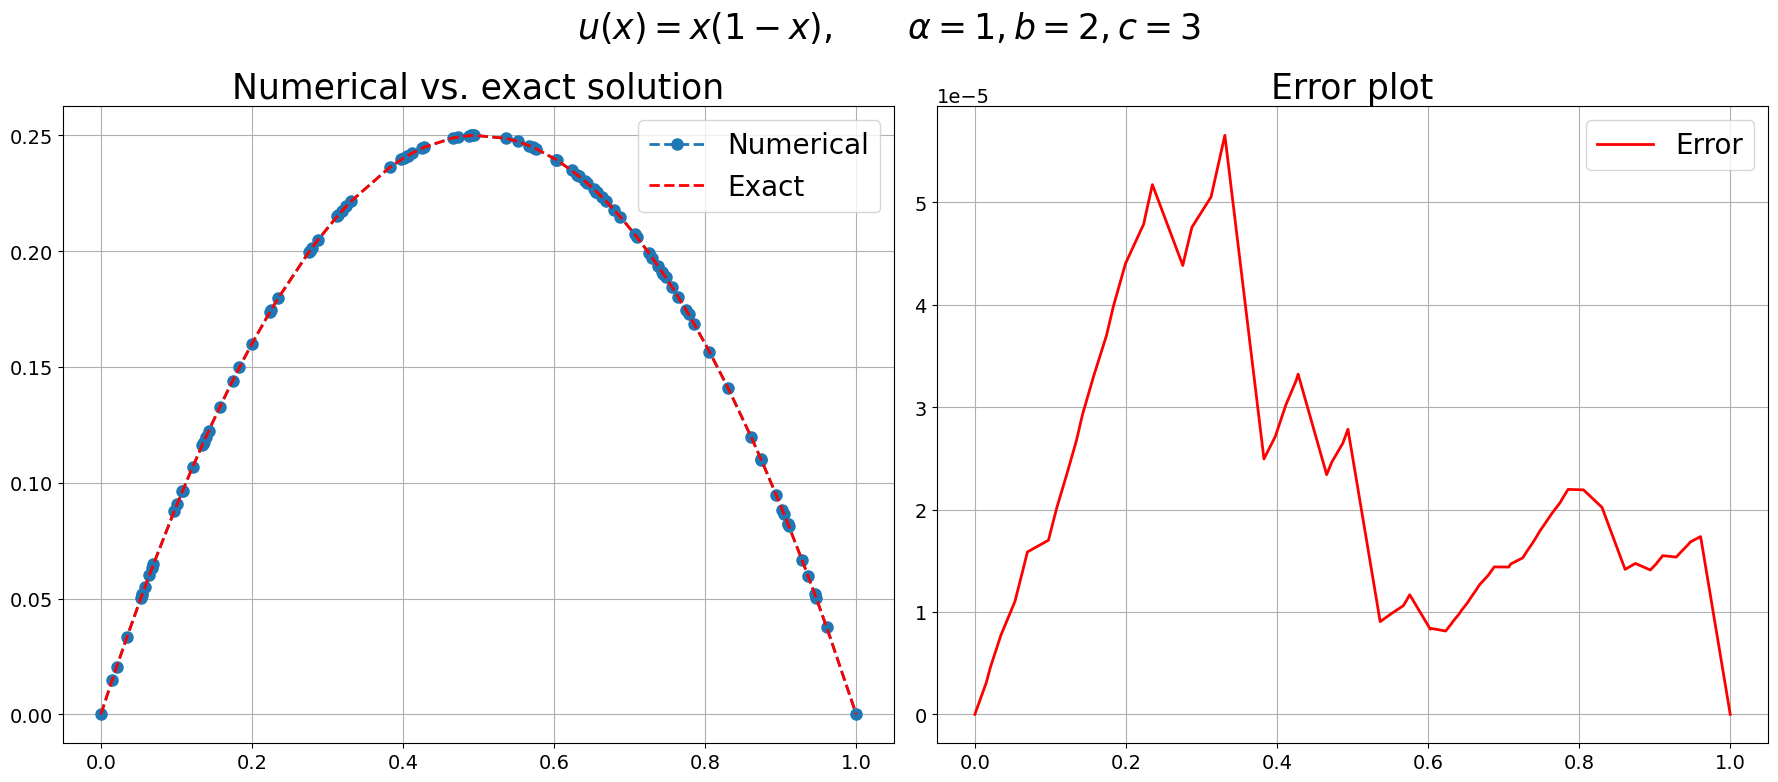

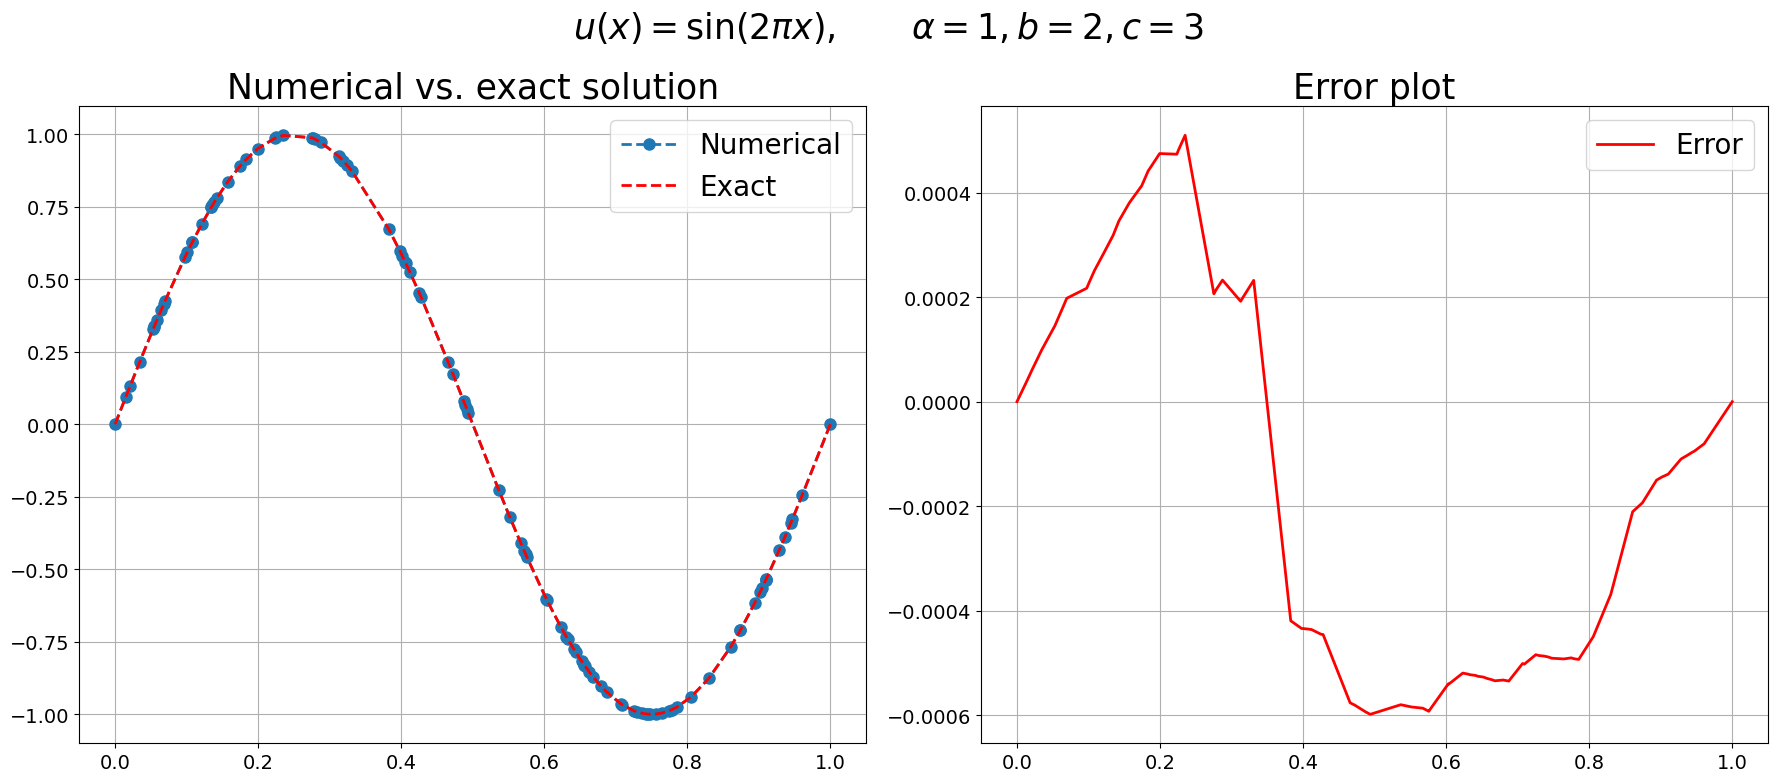

In [6]:
M=100

a=1
b=2
c=3
random_grid = np.random.rand(M)
nodes = np.concatenate(([0], random_grid, [1]))

x_grid = np.sort(nodes)                                                #Random grid
#x_grid = np.linspace(0,1,M)                                           #Equvidistant grid
#x_grid = np.array([0, 0.1, 0.2,0.35,0.6, 0.7, 0.9, 0.95, 0.97, 1])    #Chosen random grid

A_1 = np.array([[1,-1],[-1,1]])
A_2 = np.array([[-1,1],[-1,1]])
A_3 = np.array([[1,1/2],[1/2,1]])

M=8
x_grid_test= np.linspace(0,1,M)
H=np.diff(x_grid_test)
A,f= Assembley_algorithme(a,b,c,A_1,A_2,A_3,M,H,x_grid_test, f_func_1) 
print(A)


U = solver_a(a, b, c, x_grid, f_func_1)
solution = analytic_func_1(x_grid)

# Plotting
plt.figure(figsize=(18, 8))

# Plot 1: Numerical vs. exact solution
plt.subplot(1, 2, 1)
plt.suptitle(r"$u(x)=x(1-x), \qquad \alpha =1, b=2, c=3 $", fontsize=25)
plt.title("Numerical vs. exact solution",  fontsize=25)
plt.plot(x_grid, U, 'o--', label="Numerical")
plt.plot(x_grid, solution, "r--", label="Exact")
plt.legend(fontsize="20", loc="upper right")

# Plot 2: Error plot
plt.subplot(1, 2, 2)
plt.title("Error plot",  fontsize=25)
plt.plot(x_grid, U - solution, 'r', label="Error")
plt.legend(fontsize="20", loc="upper right")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
U = solver_a(a, b, c, x_grid, f_func_2)
solution = analytic_func_2(x_grid)

# Plotting
plt.figure(figsize=(18, 8))

# Plot 1: Numerical vs. exact solution
plt.subplot(1, 2, 1)
plt.suptitle(r"$u(x)=\sin(2\pi x), \qquad \alpha =1, b=2, c=3 $",  fontsize=25)
plt.title("Numerical vs. exact solution",  fontsize=25)
plt.plot(x_grid, U, 'o--', label="Numerical")
plt.plot(x_grid, solution, "r--", label="Exact")
plt.legend(fontsize="20", loc="upper right")

# Plot 2: Error plot
plt.subplot(1, 2, 2)
plt.title("Error plot",  fontsize=25)
plt.plot(x_grid, U - solution, 'r', label="Error")
plt.legend(fontsize="20", loc="upper right")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Task b
We want to calculate the converegence rate for our solver in both $H^1$ and $L^2$ on $[0,1]$. To find the convergence rate we use the standard estimate of error in both norms $||u-u_h||$.

##### $L^2$:

$$
||u-u_h||_{L^2} = \sqrt{\int^1_0 |u(x)-u_h(x)|^2 dx} \approx \sqrt{\Sigma^M_{i=0} |u(x_i)-u_h(x_i)|^2 \cdot h_i} = \sqrt{\Sigma^M_{i=0} |u_i-u_{h,i}|^2\cdot h_i}
$$


##### $H^1$:

$$
\begin{align}
||u-u_h||_{H^1} &= ||u-u_h||_{L^2} +||u_x-u_{x,h}||_{L^2} \\
&\approx \sqrt{\Sigma^M_{i=0} |u(x_i)-u_h(x_i)|^2 \cdot h_i} + \sqrt{\Sigma^M_{i=0} |u_x(x_i)-u_{x,h}(x_i)|^2 \cdot h_i} \\ 
&= \sqrt{\Sigma^M_{i=0} |u_i-u_{h,i}|^2\cdot h_i} + \sqrt{\Sigma^M_{i=0} |u_{x,i}-u_{x \space h,i}|^2\cdot h_i}
\end{align}
$$

To calculate the derivitive of $u$ and $u_h$ we can use the central difference approximation for $\overline{\mathbb{G}}$ and forward/backward difference for $\partial{\mathbb{G}}$.

In [7]:
def derivative_approx(U_vec, x_grid):
    M=len(U_vec)
    h_i = np.diff(x_grid)
    
    U_x = np.zeros(M)

    U_x[0]=(U_vec[1] - U_vec[0])/h_i[0]
    U_x[-1]=(U_vec[-1] - U_vec[-2])/h_i[-1]
    
    for i in range(1,M-1):
        U_x[i] = (U_vec[i+1] - U_vec[i-1])/(h_i[i]+h_i[i-1])
        
    return U_x

def error_bound(a,b,c, h_max, const):
    return np.max(np.array([a,b,c]))/(np.min(np.array([a,c])))*np.sqrt(2)*h_max*const

In [8]:
#Reuse convergence-tester from lecture-code. Modify it to fit our impl
def convergence_test_space(a, b, c, rhs_func, u_analytic, solver=solver_a):
    P = 8
    Hconv = np.zeros(P)
    H1conv = np.zeros(P)
    Lconv = np.zeros(P)
    M = 25
    for p in range(P):
        x_grid = np.linspace(0,1,M)
        x_grid_2 = np.linspace(0,1,3*M)
        
        U  = solver(1, 2, 3, x_grid, rhs_func)
        solution = u_analytic(x_grid)
        
        Eh=U-solution
        U_interpolation = interpolate.interp1d(x_grid,U)
        
        gradient = np.gradient(U_interpolation(x_grid_2)-u_analytic(x_grid_2), x_grid_2)
        
        Hconv[p] = (x_grid[1]-x_grid[0])

        Lconv[p] = np.sqrt( integrate.simps( np.abs(Eh)**2, x_grid) )
        H1conv[p] = np.sqrt( integrate.simps( np.abs(Eh)**2, x_grid) + integrate.simps( gradient**2, x_grid_2) ) 
        
        M = 2*M

    Lorder = np.polyfit(np.log(Hconv),np.log(Lconv),1)[0]
    H1order = np.polyfit(np.log(Hconv),np.log(H1conv),1)[0]
    return Hconv, Lconv, Lorder, H1conv, H1order

In [9]:
H_conv, L_conv, L_p, H1_conv, H1_p = convergence_test_space(1, 2, 3, f_func_2, analytic_func_2, solver_a)


import pandas as pd #To format the output of the notebook.  
LRate=np.zeros(np.size(L_conv))
LRate[1:]=np.log10(L_conv[1:]/L_conv[:-1])/np.log10(H_conv[1:]/H_conv[:-1])
H1Rate=np.zeros(np.size(H1_conv))
H1Rate[1:]=np.log10(H1_conv[1:]/H1_conv[:-1])/np.log10(H_conv[1:]/H_conv[:-1])
pd.options.display.float_format = '{:.8f}'.format
df = pd.DataFrame(data={'h': H_conv, 'L Error': L_conv , 'L Rate':LRate, 'H1 Error': H1_conv , 'H1 Rate':H1Rate}) 
df


,h,L Error,L Rate,H1 Error,H1 Rate
0,0.04166667,0.00159442,0.00000000,0.10478131,0.00000000
1,0.02040816,0.00038183,2.00245001,0.04808245,1.09133472
2,0.01010101,0.00009350,2.00058808,0.02316096,1.03860315
3,0.00502513,0.00002314,2.00014514,0.01138474,1.01720030
4,0.00250627,0.00000576,2.00003607,0.00564647,1.00803059
5,0.00125156,0.00000144,2.00000911,0.00281214,1.00386779
6,0.00062539,0.00000036,2.00000166,0.00140334,1.00189641
7,0.00031260,0.00000009,2.00024783,0.00070100,1.00093876


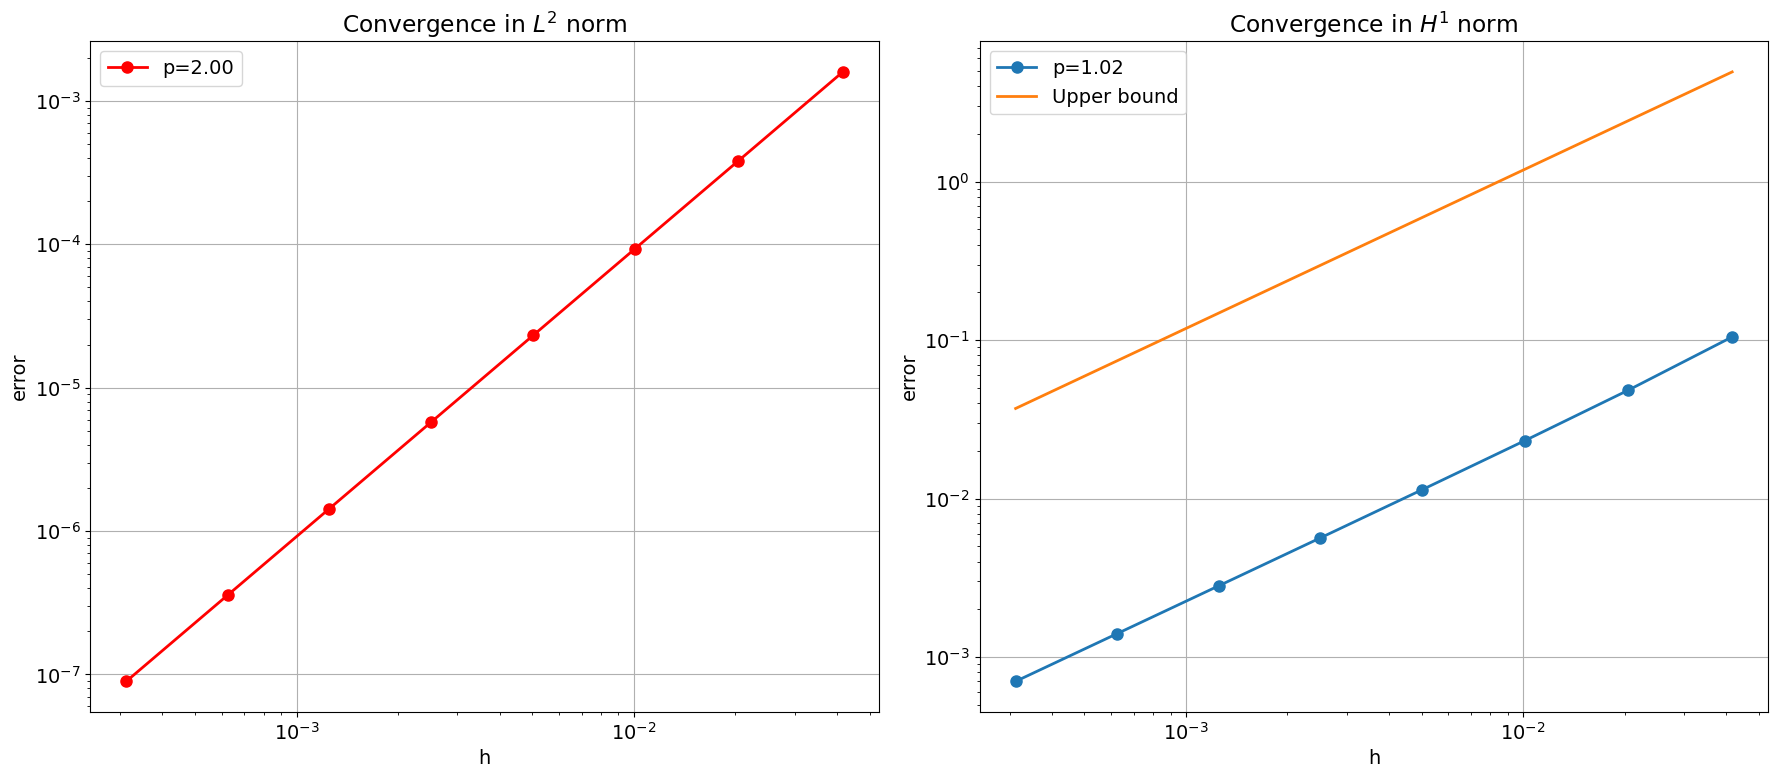

In [10]:
const_1 = 2
const_2 = np.sqrt(2)*2*np.pi**2

# Creating subplots
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(18, 8))

# second subplot
ax2.loglog(H_conv, L_conv, 'o-', color="red", label='p={:.2f}'.format(L_p))
ax2.grid(True)
ax2.set_xlabel('h')
ax2.set_ylabel('error')
ax2.set_title(r"Convergence in $L^2$ norm")
ax2.legend()

# third subplot
ax3.loglog(H_conv, H1_conv, 'o-', label='p={:.2f}'.format(H1_p))
ax3.loglog(H_conv, error_bound(a,b,c,H_conv,const_2), label =  "Upper bound")
ax3.grid(True)
ax3.set_xlabel('h')
ax3.set_ylabel('error')
ax3.set_title(r"Convergence in $H^1$ norm")
ax3.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## Task D)

In [11]:
# W1                              ### Must fix
def w1(x): 
    return np.where(x <= np.sqrt(2)/2, 2*x/np.sqrt(2), (1-x)/(1- np.sqrt(2)/2)) 

def w1grad(x):
    return np.where(x <= np.sqrt(2)/2, 2/np.sqrt(2), -1/(1 - np.sqrt(2)/2))

def f_w1(x, alpha, b, c):
    return b* w1grad(x) + c*w1(x)

def w1_x(x):
    return np.where(x < np.sqrt(2)/2, 1/(np.sqrt(2)/2), (-1)/(1 - np.sqrt(2)/2))

def contribution_F(func, x_grid, a):
    f_phi_x_1 = lambda x, h_i: (1/h_i)*w1_x(x)
    f_phi_x_0 = lambda x, h_i: (-1/h_i)*w1_x(x)

    F_vec=np.zeros(len(x_grid))

    for i in range(1,len(x_grid)-1):
        integral_0 = a*integrate.quad(f_phi_x_0, x_grid[i-1], x_grid[i], args=((x_grid[i] - x_grid[i-1])))[0]
        integral_1 = a*integrate.quad(f_phi_x_1, x_grid[i], x_grid[i+1], args=((x_grid[i+1] - x_grid[i])))[0]
        F_vec[i]=integral_0+integral_1
    return F_vec

#W2
def analytic_func_3(x):
    return x-x**(3/4)

def f_func_3(x,a,b,c):
    return -(3*a)/(16*x**(5/4))-(3*b)/(4*x**(1/4))+b-c*x**(3/4)+c*x

In [12]:
def solver_d(a, b, c, x_grid, rhs_f, w_i):
    M = len(x_grid)
    T = np.transpose(np.array([x_grid[:-1],x_grid[1:]]))
    H=np.diff(x_grid)

    A_1 = np.array([[1,-1],[-1,1]])
    A_2 = np.array([[-1,1],[-1,1]])
    A_3 = np.array([[1,1/2],[1/2,1]])
    
    A,f= Assembley_algorithme(a,b,c,A_1,A_2,A_3,M,H,x_grid, rhs_f)             #Asembly of stifness matrix and load vector
    
    
    F_contribution = contribution_F(w_i, x_grid, a)[1:-1]
    
    f=-F_contribution+f

    U=np.zeros(M)
    U[0]=0
    U[-1]=0
    
    U_prime = np.linalg.solve(A,f)
    U[1:-1] = U_prime


    return U


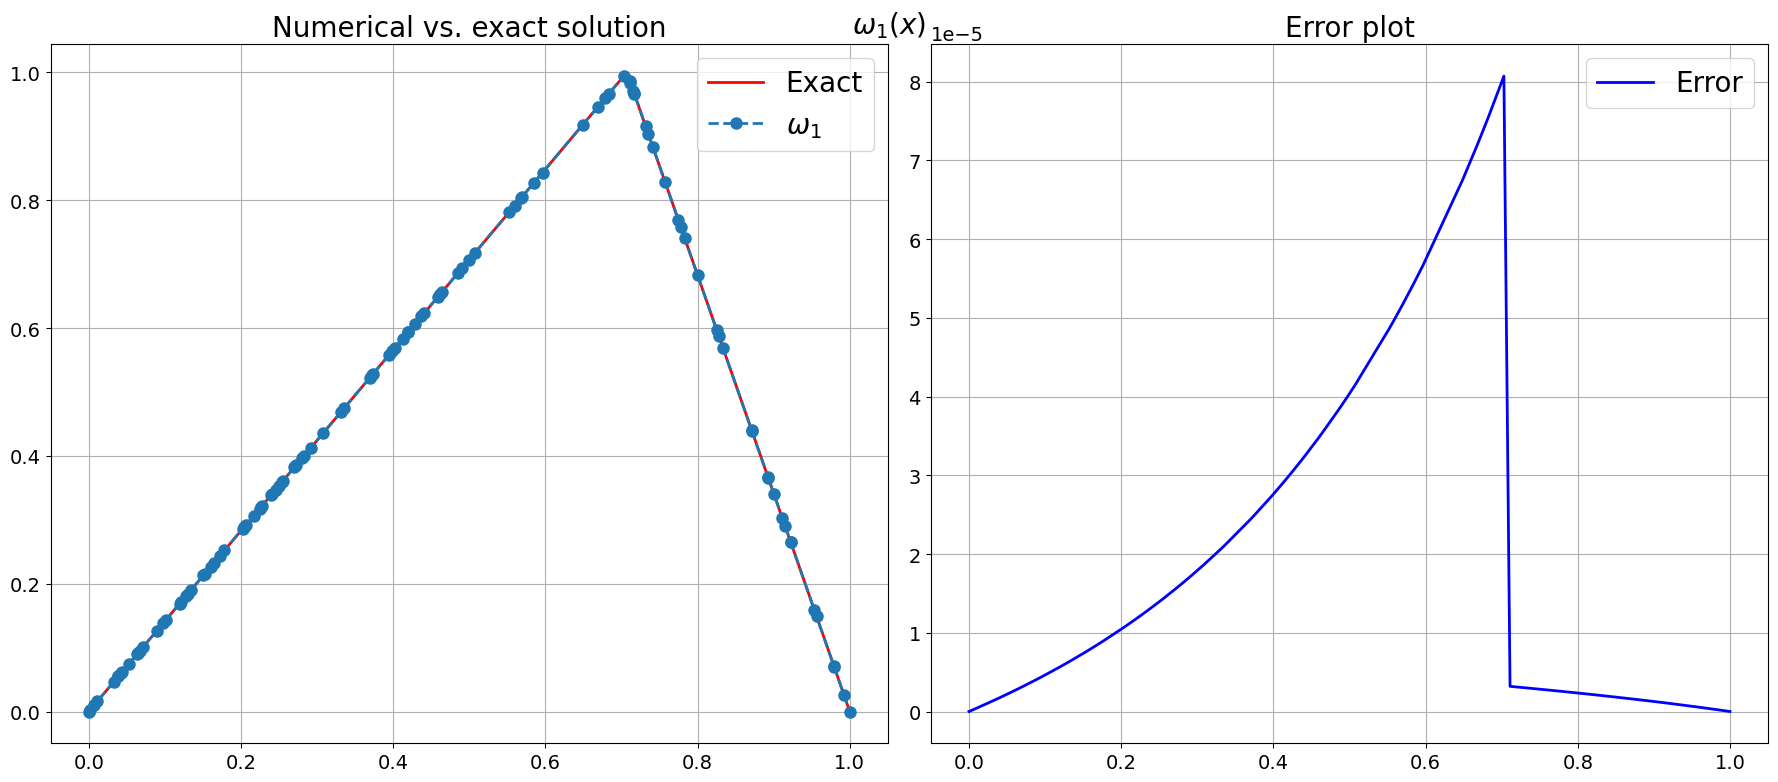

In [13]:
a = 1
b = 2
c = 3
M = 111

random_grid = np.random.rand(M)
nodes = np.concatenate(([0], random_grid, [1]))

x_grid = np.sort(nodes)  # Random grid
# x_grid = np.linspace(0,1,M)  # Equidistant grid
# x_grid = np.array([0, 0.1, 0.2,0.35,0.6, 0.7, 0.9, 0.95, 0.97, 1])  # Chosen random grid

Omega_1 = solver_d(a, b, c, x_grid, f_w1, w1)
solution_1 = w1(x_grid)


Omega_2 = solver_a(a, b, c, x_grid, f_func_3)
solution_2 = analytic_func_3(x_grid)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Subplot 1: Numerical vs. exact solution
axes[0].set_title("Numerical vs. exact solution", fontsize = 20)
axes[0].plot(x_grid, solution_1, "r", label="Exact")
axes[0].plot(x_grid, Omega_1, 'o--', label=r"$\omega_1$")
axes[0].legend(fontsize="20", loc="upper right")

# Subplot 2: Error plot
axes[1].set_title("Error plot", fontsize = 20)
axes[1].plot(x_grid, Omega_1 - solution_1, 'b', label="Error")
axes[1].legend(fontsize="20", loc="upper right")

plt.tight_layout()
plt.suptitle(r'$\omega_1(x)$', fontsize = 20)
plt.savefig("omega_1_sol_and_error.png")
plt.show()


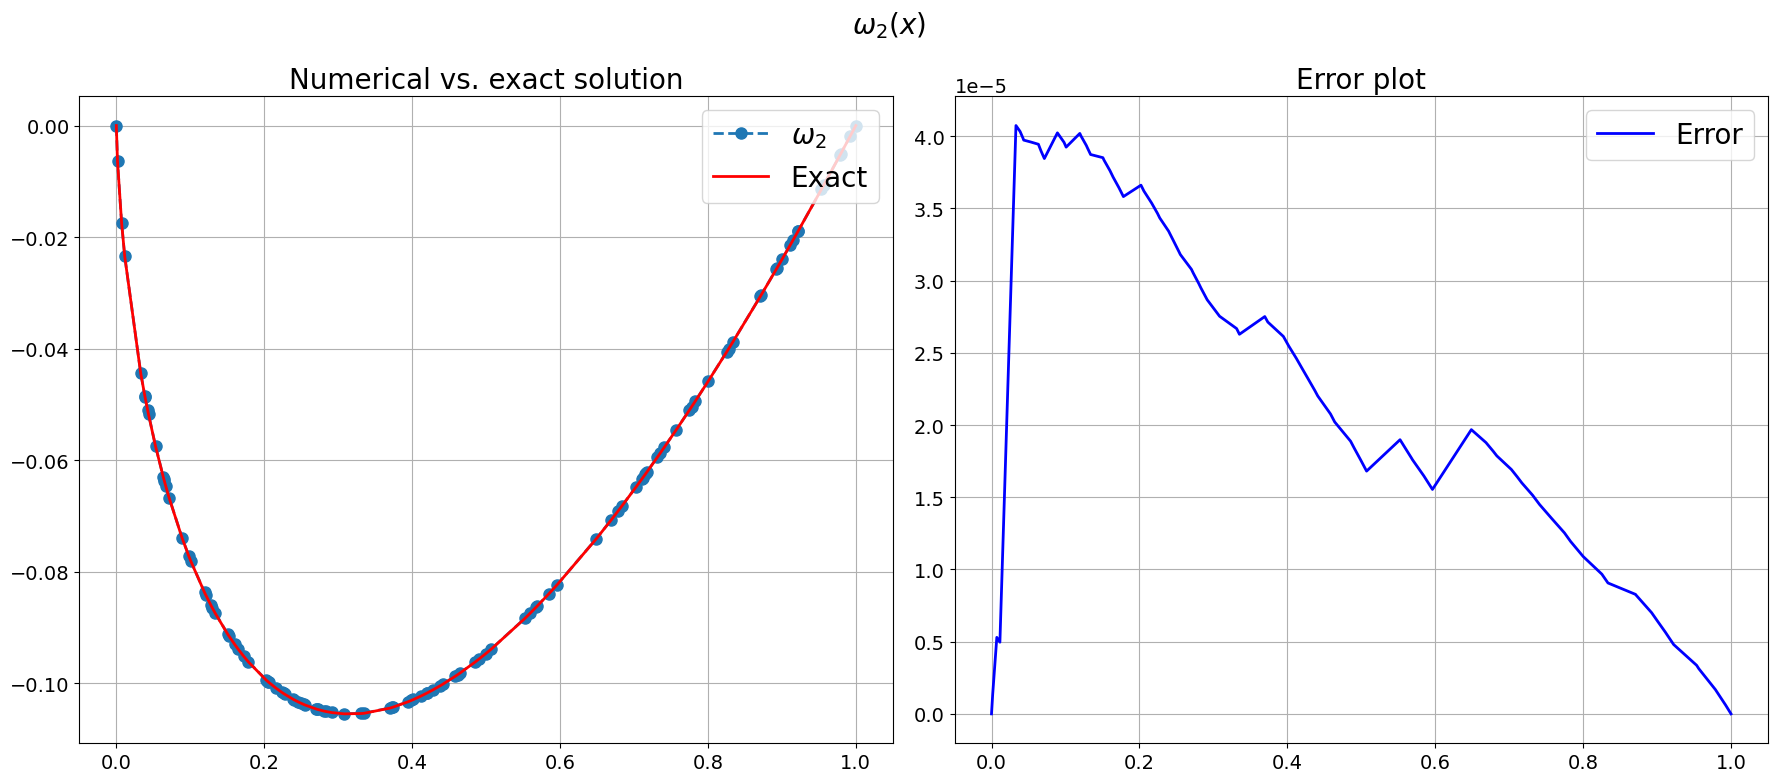

In [14]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Subplot 1: Numerical vs. exact solution
axes[0].set_title("Numerical vs. exact solution", fontsize = 20)
axes[0].plot(x_grid, Omega_2, 'o--', label=r"$\omega_2$")
axes[0].plot(x_grid, solution_2, "r", label="Exact")
axes[0].legend(fontsize="20", loc="upper right")

# Subplot 2: Error plot
axes[1].set_title("Error plot", fontsize = 20)
axes[1].plot(x_grid, Omega_2 - solution_2, 'b', label="Error")
axes[1].legend(fontsize="20", loc="upper right")

plt.suptitle(r'$\omega_2(x)$', fontsize = 20)
plt.tight_layout()
plt.savefig("omega_2_sol_and_error.png")
plt.show()


In [15]:
#Reuse convergence-tester from lecture-code. Modify it to fit our impl
def convergence_test_space_w_2(a, b, c, rhs_func, u_analytic, solver, w_i):
    P = 8
    Hconv = np.zeros(P)
    H1conv = np.zeros(P)
    Lconv = np.zeros(P)
    M = 50
    for p in range(P):
        x_grid = np.linspace(0,1,M)
        x_grid_2 = np.linspace(0,1,5*M)
        
        U  = solver(1, 2, 3, x_grid, rhs_func, w_i)
        solution = u_analytic(x_grid)
        
        Eh=np.abs(U-solution)
        U_interpolation = interpolate.interp1d(x_grid,U)
        
        gradient = np.gradient(U_interpolation(x_grid_2)-u_analytic(x_grid_2), x_grid_2)
        
        Hconv[p] = (x_grid[1]-x_grid[0])

        Lconv[p] = np.sqrt( integrate.simps( np.abs(Eh)**2, x_grid) )
        H1conv[p] = np.sqrt( integrate.simps( np.abs(Eh)**2, x_grid) + integrate.simps( gradient**2, x_grid_2) ) 
        
        M = 2*M+1

    Lorder = np.polyfit(np.log(Hconv),np.log(Lconv),1)[0]
    H1order = np.polyfit(np.log(Hconv),np.log(H1conv),1)[0]
    return Hconv, Lconv, Lorder, H1conv, H1order

In [16]:
H_conv, L_conv, L_p, H1_conv, H1_p = convergence_test_space_w_2(1, 2, 3, f_w1, w1, solver_d,w1)


import pandas as pd #To format the output of the notebook.  
LRate=np.zeros(np.size(L_conv))
LRate[1:]=np.log10(L_conv[1:]/L_conv[:-1])/np.log10(H_conv[1:]/H_conv[:-1])
H1Rate=np.zeros(np.size(H1_conv))
H1Rate[1:]=np.log10(H1_conv[1:]/H1_conv[:-1])/np.log10(H_conv[1:]/H_conv[:-1])
pd.options.display.float_format = '{:.8f}'.format
df = pd.DataFrame(data={'h': H_conv, 'L Error': L_conv , 'L Rate':LRate, 'H1 Error': H1_conv , 'H1 Rate':H1Rate}) 
df


,h,L Error,L Rate,H1 Error,H1 Rate
0,0.02040816,0.00017689,0.00000000,0.27359754,0.00000000
1,0.01000000,0.00003857,2.13520745,0.16004727,0.75164933
2,0.00495050,0.00000634,2.56849318,0.07668398,1.04647839
3,0.00246305,0.00000090,2.80058617,0.02366975,1.68388426
4,0.00122850,0.00000069,0.37062057,0.06124414,-1.36667712
5,0.00061350,0.00000017,2.00108232,0.04652024,0.39601200
6,0.00030656,0.00000004,1.94591898,0.03283460,0.50219717
7,0.00015323,0.00000001,2.04132128,0.02314906,0.50404048


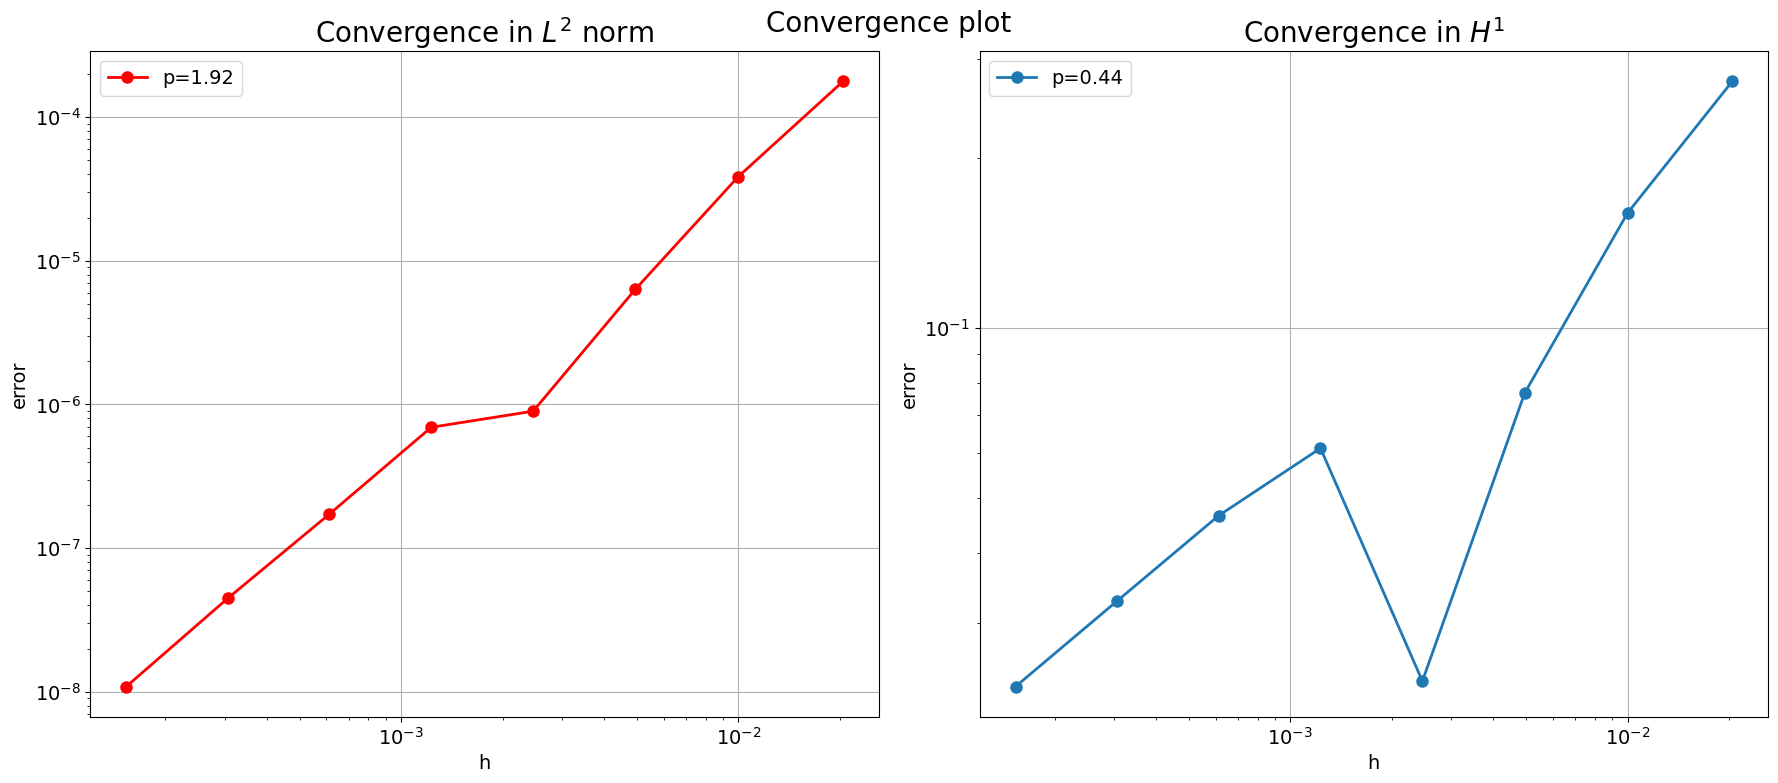

In [17]:
# Creating subplots
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(18, 8))



# second subplot
ax2.loglog(H_conv, L_conv, 'o-', color="red", label='p={:.2f}'.format(L_p))
ax2.grid(True)
ax2.set_xlabel('h')
ax2.set_ylabel('error')
ax2.set_title(r"Convergence in $L^2$ norm", fontsize = 20)
ax2.legend()

# third subplot
ax3.loglog(H_conv, H1_conv, 'o-', label='p={:.2f}'.format(H1_p))
ax3.grid(True)
ax3.set_xlabel('h')
ax3.set_ylabel('error')
ax3.set_title(r"Convergence in $H^1$", fontsize = 20)
ax3.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.suptitle(f'Convergence plot', fontsize = 20)
plt.savefig("convergence_omega_1.png")
plt.show()


## Task E

In [18]:
def Assembley_algorithme_e(c_1, c_2, c_3, A_1, A_2, A_3, M_i, H_i, x_grid, func):
    A = np.zeros((M_i,M_i))
    f_vec = np.zeros((M_i))

    f_1 = lambda x, x_0, h_i: func(x,c_1,c_2,c_3)*(1)/h_i
    f_0 = lambda x, x_0, h_i: func(x,c_1,c_2,c_3)*(-1)/h_i
    
    
    for i in range(1, M_i-1):
        integral_1 = integrate.quad(f_1, x_grid[i-1], x_grid[i], args=(x_grid[i-1], x_grid[i] - x_grid[i-1]))[0]
        integral_0 = integrate.quad(f_0, x_grid[i], x_grid[i+1], args=(x_grid[i], x_grid[i+1] - x_grid[i]))[0]
        f_vec[i] = integral_0 + integral_1

    for k in range(0,(M_i-1)):
        for alpha in range(2):
            i=loc2glob(k,alpha)
            for beta in range(2):
                j = loc2glob(k,beta)
                A[i,j] += c_1*A_1[alpha,beta]/H_i[k] + (c_2/2)*A_2[alpha,beta] + (c_3*H_i[k]/3)*A_3[alpha,beta]

    return A[1:-1,1:-1], f_vec[1:-1]



In [19]:
def solver_e(a, b, c, x_grid, rhs_f):
    M = len(x_grid)
    T = np.transpose(np.array([x_grid[:-1],x_grid[1:]]))
    H=np.diff(x_grid)

    A_1 = np.array([[1,-1],[-1,1]])
    A_2 = np.array([[-1,1],[-1,1]])
    A_3 = np.array([[1,1/2],[1/2,1]])
    
    A,f= Assembley_algorithme_e(a,b,c,A_1,A_2,A_3,M,H,x_grid, rhs_f)             #Asembly of stifness matrix and load vector

    U=np.zeros(M)
    U[0]=0
    U[-1]=0
    
    U_prime = np.linalg.solve(A,f)
    U[1:-1] = U_prime


    return U

In [20]:
def create_grid(r, M):
    x_grid = np.zeros(M)
    for i in range(1,M):
        x_grid[i]=r**(M-i-1)
    return x_grid

In [21]:
def rhs_f1(x,a,b,c):
    return -5/3*x**(3/5)

def rhs_f2(x,a,b,c):
    return 5/2*x**(-2/5)

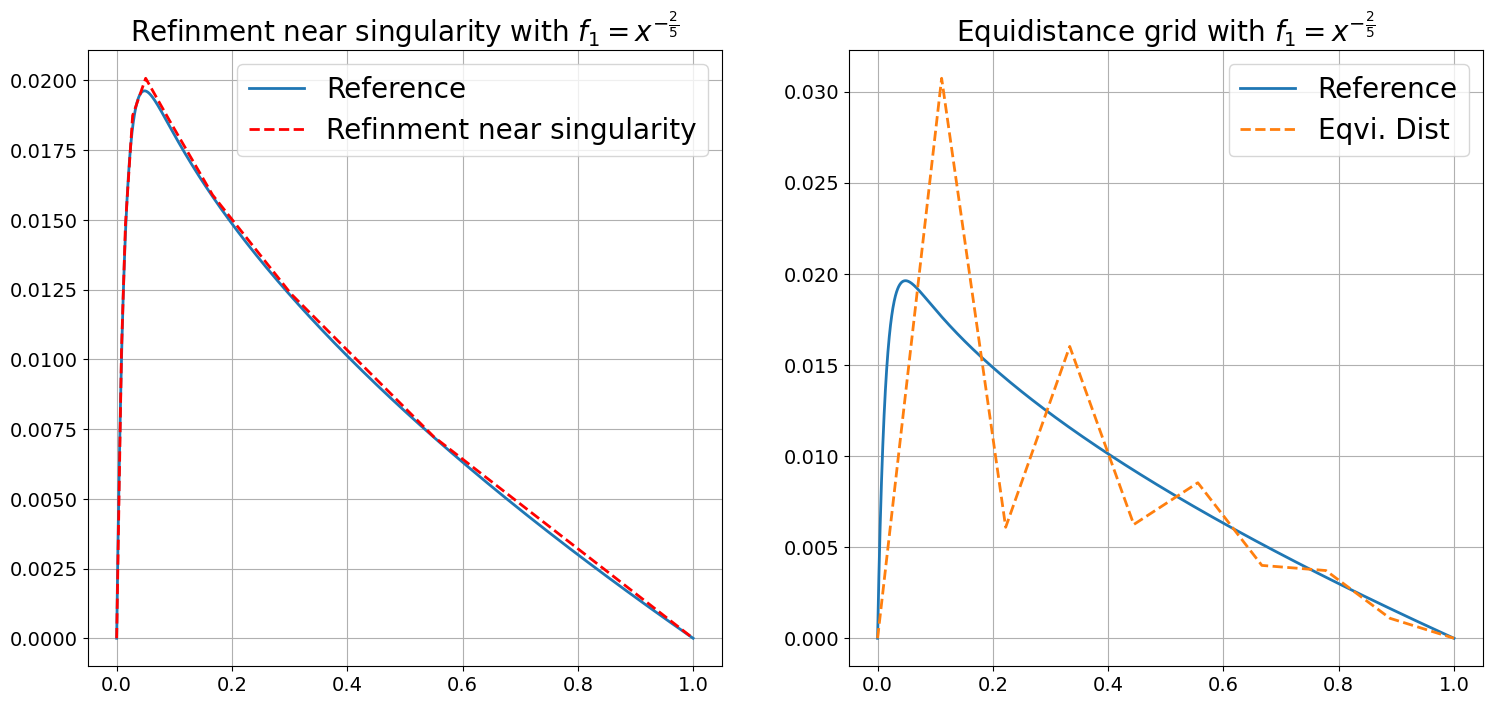

In [22]:
a=1
b=-70
c=1

M_ref=1000
M=10
r_ref = 0.99
r=0.55

x_grid_eqvi = np.linspace(0,1,M)                                           #Equvidistant grid
x_grid = create_grid(r,M)
x_grid_ref = create_grid(r_ref,M_ref)


U = solver_e(a, b, c, x_grid, rhs_f1)
U_eqvi = solver_e(a,b,c,x_grid_eqvi, rhs_f1)
U_ref = solver_e(a,b,c, x_grid_ref, rhs_f1)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 8))

ax0.set_title(r'Refinment near singularity with $f_1 = x^{-\frac{2}{5}}$', fontsize = 20)
ax0.plot()
ax0.plot(x_grid_ref, U_ref, label= "Reference")
ax0.plot(x_grid,U,'r--', label= "Refinment near singularity")
ax0.legend(fontsize="20", loc="upper right")


ax1.set_title(r'Equidistance grid with $f_1 = x^{-\frac{2}{5}}$', fontsize = 20)
ax1.plot(x_grid_ref, U_ref , label= "Reference")
ax1.plot(x_grid_eqvi,U_eqvi, "--", label="Eqvi. Dist")
ax1.legend(fontsize="20", loc="upper right")

plt.savefig("refinement_and_equidistance_f_1.png")

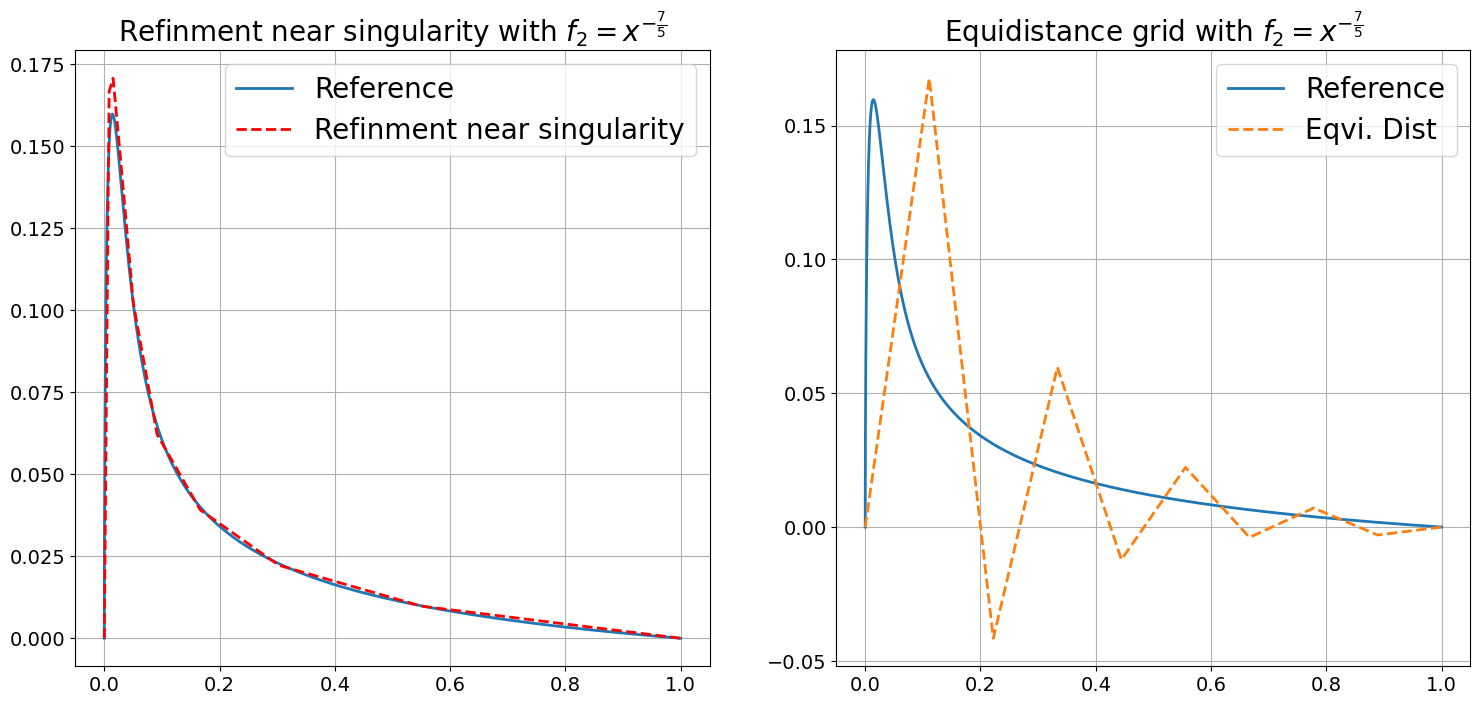

In [23]:
a=1
b=-70
c=1

M_ref=1000
M=10
r_ref = 0.99
r=0.55

x_grid_eqvi = np.linspace(0,1,M)                                           #Equvidistant grid
x_grid = create_grid(r,M)
x_grid_ref = create_grid(r_ref,M_ref)


U = solver_e(a, b, c, x_grid, rhs_f2)
U_eqvi = solver_e(a,b,c,x_grid_eqvi, rhs_f2)
U_ref = solver_e(a,b,c, x_grid_ref, rhs_f2)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 8))

ax0.set_title(r'Refinment near singularity with $f_2 = x^{-\frac{7}{5}}$', fontsize = 20)
ax0.plot()
ax0.plot(x_grid_ref, U_ref, label= "Reference")
ax0.plot(x_grid,U,'r--', label= "Refinment near singularity")
ax0.legend(fontsize="20", loc="upper right")


ax1.set_title(r'Equidistance grid with $f_2 = x^{-\frac{7}{5}}$', fontsize = 20)
ax1.plot(x_grid_ref, U_ref , label= "Reference")
ax1.plot(x_grid_eqvi,U_eqvi, "--", label="Eqvi. Dist")
ax1.legend(fontsize="20", loc="upper right")

plt.savefig("refinement_and_equidistance_f_2.png")

## f)

In [31]:
#Reuse convergence-tester from lecture-code. Modify it to fit our impl
def Norm_function(r, M, M_ref, r_ref,a,b,c,func):
    
    x_grid = create_grid(r,M)
    x_grid_ref = create_grid(r_ref,M_ref)
    
    x_grid_1= np.linspace(0,1,M*4)

    U = solver_e(a, b, c, x_grid, func)
    U_ref = solver_e(a,b,c, x_grid_ref, func)

    U_interpolation = interpolate.interp1d(x_grid,U)
    Ref_U_interpolation = interpolate.interp1d(x_grid_ref,U_ref)
    
    """
    print(r)
    plt.figure()
    plt.plot(x_grid, U_interpolation(x_grid))
    plt.plot(x_grid, Ref_U_interpolation(x_grid))
    plt.show()
    """
    
    Eh=U_interpolation(x_grid)-Ref_U_interpolation(x_grid) 
    gradient = np.gradient(U_interpolation(x_grid)-Ref_U_interpolation(x_grid), x_grid)

    L2_error = np.sqrt(integrate.simpson(np.abs(Eh)**2,x_grid))
    H1_error = np.sqrt(integrate.simpson(np.abs(Eh)**2, x_grid) + integrate.simpson(gradient**2, x_grid)) 
    
    return L2_error, H1_error

In [30]:
def optimal_r(M, func_test):
    M_ref = 1000
    r = 0.9
    P = 70
    list_r=np.zeros(P)
    L2_error=np.zeros(P)
    H1_error=np.zeros(P)


    for i in range(P):
        list_r[i]=r
        L2_error[i], H1_error[i] = Norm_function(r, M, M_ref, r_ref,a,b,c, func_test)
        r=r-0.01
    

    x_grid_ref = create_grid(r_ref,M_ref)
    x_grid_eqvi = np.linspace(0,1,M)   
    U_ref = solver_e(a,b,c,x_grid_ref, func_test)
    U_eqvi = solver_e(a,b,c,x_grid_eqvi, func_test)

    U_interpolation = interpolate.interp1d(x_grid_eqvi,U_eqvi)
    Ref_U_interpolation = interpolate.interp1d(x_grid_ref,U_ref)
    Eh=U_interpolation(x_grid_eqvi)-Ref_U_interpolation(x_grid_eqvi) 
    print(Eh)
    gradient = np.gradient(U_interpolation(x_grid_eqvi)-Ref_U_interpolation(x_grid_eqvi), x_grid_eqvi)
    L2_value = np.sqrt(abs(integrate.simpson(np.abs(Eh)**2, x_grid_eqvi)))
    H1_value = np.sqrt( integrate.simpson( np.abs(Eh)**2, x_grid_eqvi) + integrate.simpson( gradient**2, x_grid_eqvi)) 
    return [list_r[np.argmin(L2_error)],np.min(L2_error), L2_value, list_r[np.argmin(H1_error)],np.min(H1_error), H1_value]

In [32]:
a=1
b=-100
c=1

func_test =rhs_f1
M_ref=1000
r_ref=0.99

M=10
r=0.9



P=70
list_r=np.zeros(P)
L2_error=np.zeros(P)
H1_error=np.zeros(P)


for i in range(P):
    list_r[i]=r
    L2_error[i], H1_error[i] = Norm_function(r, M, M_ref, r_ref,a,b,c, func_test)
    r=r-0.01

    
x_grid_ref = create_grid(r_ref,M_ref)
x_grid_eqvi = np.linspace(0,1,M)   

U_ref = solver_e(a,b,c,x_grid_ref, func_test)
U_eqvi = solver_e(a,b,c,x_grid_eqvi, func_test)

U_interpolation = interpolate.interp1d(x_grid_eqvi,U_eqvi)
Ref_U_interpolation = interpolate.interp1d(x_grid_ref,U_ref)

Eh=U_interpolation(x_grid_eqvi)-Ref_U_interpolation(x_grid_eqvi) 
gradient = np.gradient(U_interpolation(x_grid_eqvi)-Ref_U_interpolation(x_grid_eqvi), x_grid_eqvi)
L2_value = np.sqrt(abs(integrate.simpson(np.abs(Eh)**2, x_grid_eqvi)))
H1_value = np.sqrt( integrate.simpson( np.abs(Eh)**2, x_grid_eqvi) + integrate.simpson( gradient**2, x_grid_eqvi)) 

L2_values= np.ones(P)*L2_value
H1_values = np.ones(P)*H1_value


/var/folders/21/q6thhsn14n7gnn88h4prdf1h0000gn/T/ipykernel_76310/3453580431.py:26: RuntimeWarning: invalid value encountered in sqrt
  L2_error = np.sqrt(integrate.simpson(np.abs(Eh)**2,x_grid))
/var/folders/21/q6thhsn14n7gnn88h4prdf1h0000gn/T/ipykernel_76310/3453580431.py:27: RuntimeWarning: invalid value encountered in sqrt
  H1_error = np.sqrt(integrate.simpson(np.abs(Eh)**2, x_grid) + integrate.simpson(gradient**2, x_grid))


0.3099999999999995 nan
0.2999999999999995 nan


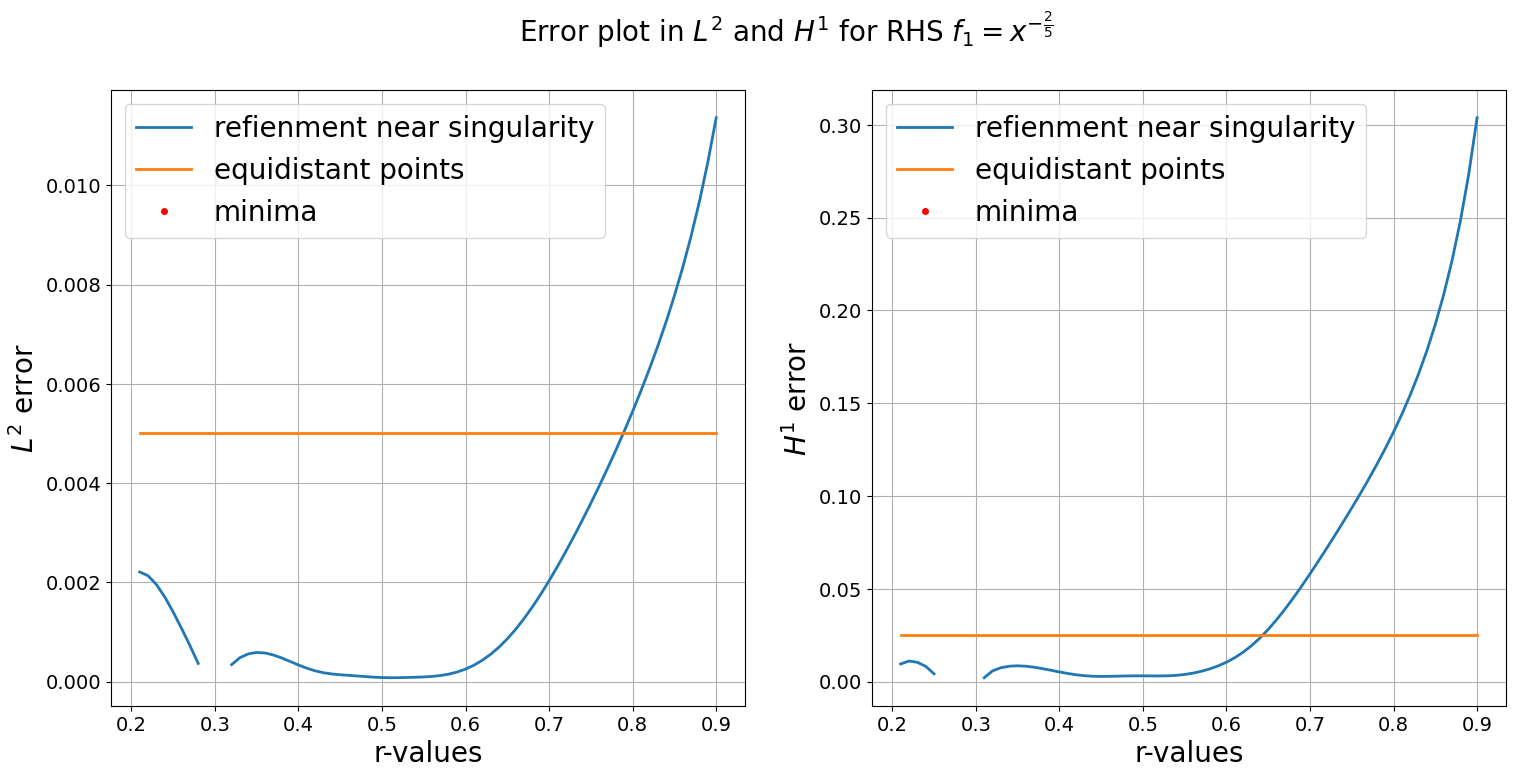

In [27]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 8))


ax0.plot(list_r, L2_error, label = 'refienment near singularity')
ax0.set_ylabel(r'$L^2$ error', fontsize = 20)
ax0.set_xlabel('r-values', fontsize = 20)
ax0.plot(list_r, L2_values, label  = 'equidistant points')
ax0.plot(list_r[np.argmin(L2_error)], np.min(L2_error), '.r', label = 'minima')
ax0.legend(fontsize = 20)
print(list_r[np.argmin(L2_error)], np.min(L2_error))


ax1.plot(list_r, H1_error, label = 'refienment near singularity')
ax1.set_ylabel(r'$H^1$ error', fontsize = 20)
ax1.set_xlabel('r-values', fontsize = 20)
ax1.plot(list_r, H1_values, label  = 'equidistant points')
ax1.plot(list_r[np.argmin(H1_error)], np.min(H1_error), '.r', label = 'minima')
ax1.legend(fontsize = 20)

plt.suptitle(r'Error plot in $L^2$ and $H^1$ for RHS $f_1 = x^{-\frac{2}{5}}$', fontsize = 20)
plt.savefig("optimal_r_for_f1.png")
print(list_r[np.argmin(H1_error)], np.min(H1_error))

In [28]:
M = [10,50]
for m in M:
    print(optimal_r(m, rhs_f1)) 

/var/folders/21/q6thhsn14n7gnn88h4prdf1h0000gn/T/ipykernel_76310/1737038024.py:26: RuntimeWarning: invalid value encountered in sqrt
  L2_error = np.sqrt(integrate.simps(np.abs(Eh)**2,x_grid))
/var/folders/21/q6thhsn14n7gnn88h4prdf1h0000gn/T/ipykernel_76310/1737038024.py:27: RuntimeWarning: invalid value encountered in sqrt
  H1_error = np.sqrt( integrate.simps( np.abs(Eh)**2, x_grid) + integrate.simps( gradient**2, x_grid))


[ 0.          0.00998648 -0.00799892  0.00454754 -0.00415177  0.00189866
 -0.00230076  0.00061845 -0.00140848  0.        ]
[0.3099999999999995, nan, 0.0050054461911472605, 0.2999999999999995, nan, 0.025273847776325128]
[ 0.00000000e+00  2.35652104e-03  2.52390817e-04  2.32873192e-05
 -2.56942881e-06 -4.07400705e-06 -3.25744940e-06 -2.53893809e-06
 -2.02243405e-06 -1.65752860e-06 -1.37719905e-06 -1.18140694e-06
 -1.00040297e-06 -8.71203541e-07 -7.85380381e-07 -6.91732494e-07
 -6.24467611e-07 -5.60693258e-07 -5.07713453e-07 -4.56810434e-07
 -4.08595261e-07 -3.81973475e-07 -3.50889004e-07 -3.18599377e-07
 -2.70172973e-07 -2.49632277e-07 -2.29919063e-07 -2.33198040e-07
 -2.17075324e-07 -1.91946932e-07 -1.76786425e-07 -1.78403314e-07
 -1.65005063e-07 -1.51092167e-07 -1.42110718e-07 -1.35463246e-07
 -1.21387077e-07 -8.37204842e-08 -1.03202781e-07 -9.52400810e-08
 -7.93842020e-08 -7.97977629e-08 -7.89606433e-08 -3.22874234e-08
 -6.44937800e-08 -6.75149272e-08 -5.40459959e-08 -3.39154525e-08
 

In [29]:
M = [10,50]
for m in M:
    print(optimal_r(m, rhs_f2)) 

/var/folders/21/q6thhsn14n7gnn88h4prdf1h0000gn/T/ipykernel_76310/1737038024.py:27: RuntimeWarning: invalid value encountered in sqrt
  H1_error = np.sqrt( integrate.simps( np.abs(Eh)**2, x_grid) + integrate.simps( gradient**2, x_grid))
/var/folders/21/q6thhsn14n7gnn88h4prdf1h0000gn/T/ipykernel_76310/1737038024.py:26: RuntimeWarning: invalid value encountered in sqrt
  L2_error = np.sqrt(integrate.simps(np.abs(Eh)**2,x_grid))


[ 0.          0.08165471 -0.06721024  0.03798548 -0.03475502  0.01588579
 -0.01924885  0.00517744 -0.01178368  0.        ]
[0.24999999999999944, nan, 0.041347384321457584, 0.37999999999999956, nan, 0.2089208864941322]
[ 0.00000000e+00  5.87941924e-02 -2.25244418e-03 -1.05827604e-03
 -4.53605588e-04 -2.18764554e-04 -1.22714686e-04 -7.75084815e-05
 -5.27236940e-05 -3.79166175e-05 -2.81794007e-05 -2.18826044e-05
 -1.70065389e-05 -1.36860982e-05 -1.14479567e-05 -9.44794238e-06
 -8.01570652e-06 -6.80306729e-06 -5.84196386e-06 -5.01016891e-06
 -4.29049374e-06 -3.82575400e-06 -3.36977713e-06 -2.94763420e-06
 -2.44285852e-06 -2.17718854e-06 -1.93909715e-06 -1.86969499e-06
 -1.68295353e-06 -1.45588464e-06 -1.30196387e-06 -1.25452535e-06
 -1.12763920e-06 -1.00580628e-06 -9.16823048e-07 -8.44733596e-07
 -7.40328043e-07 -5.29654828e-07 -5.95465206e-07 -5.33183799e-07
 -4.40231812e-07 -4.20863146e-07 -3.98115066e-07 -1.87970858e-07
 -3.03409327e-07 -2.99879802e-07 -2.33269081e-07 -1.44337783e-07
 -